# Example mouse brain to atlas image registration

This example shows registration of a FMOST mouse brain being registered to the Allen common coordinate framework atlas.

This notebook will download data that was from a hackathon in 2022, https://insightsoftwareconsortium.github.io/GetYourBrainTogether/HCK01_2022_Virtual/ .

In [1]:
import numpy as np
import emlddmm
%matplotlib notebook
import matplotlib.pyplot as plt
import requests
from os.path import join,split,splitext,exists,basename
from os import makedirs


# Download the data

In [2]:
reference_url = 'https://download.brainlib.org/hackathon/2022_GYBS/input/fMOST/reference/average_template_25_mm_ASL.nii.gz'
subject_url = 'https://download.brainlib.org/hackathon/2022_GYBS/input/fMOST/subject/194062_red_mm_SLA.nii.gz'

In [3]:
reference_filename = basename(reference_url)
subject_filename = basename(subject_url)
print(f'Files to download:')
print(reference_filename,subject_filename)

Files to download:
average_template_25_mm_ASL.nii.gz 194062_red_mm_SLA.nii.gz


In [4]:
if not exists(reference_filename):
    r = requests.get(reference_url, stream=True)
    with open(reference_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)  
else:
    print(f'{reference_filename} already exists')

if not exists(subject_filename):
    r = requests.get(subject_url, stream=True)
    with open(subject_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)     
else:
    print(f'{subject_filename} already exists')

average_template_25_mm_ASL.nii.gz already exists
194062_red_mm_SLA.nii.gz already exists


# Load and visualize the data

Opening with nibabel, note only 3D images supported, sform or quaternion matrix is ignored
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 528 320 456   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    0.025 0.025 0.025 0.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoff

<IPython.core.display.Javascript object>


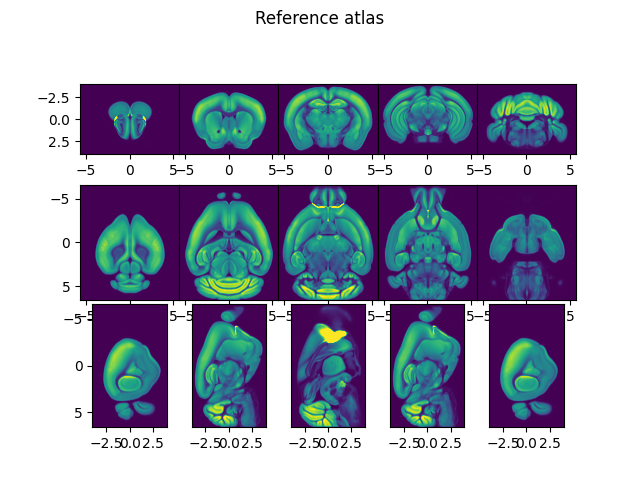

Text(0.5, 0.98, 'Reference atlas')

In [5]:
xI,I,_,_ = emlddmm.read_data(reference_filename)
I = I/np.mean(I) # normalie
fig,ax = emlddmm.draw(I,xI)
fig.suptitle('Reference atlas')

Opening with nibabel, note only 3D images supported, sform or quaternion matrix is ignored
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   3  661 1029 1125    1    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.   0.01 0.01 0.01 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoffset

<IPython.core.display.Javascript object>


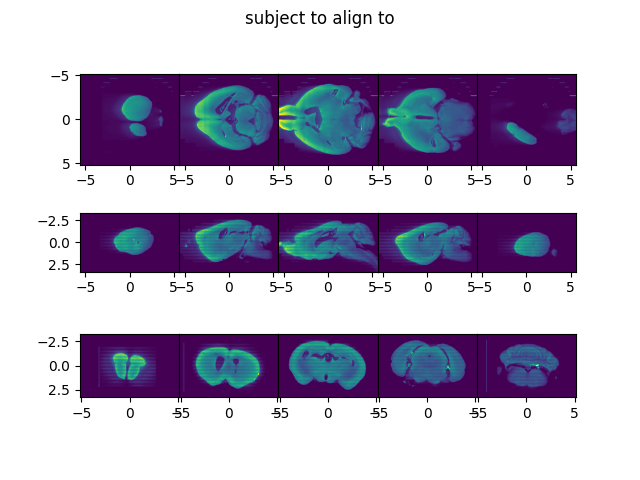

Text(0.5, 0.98, 'subject to align to')

In [6]:
xJ,J,_,_ = emlddmm.read_data(subject_filename)
J = J / np.mean(J) # normalize
fig,ax = emlddmm.draw(J,xJ)
fig.suptitle('subject to align to')

# Downsample images to about 50 microns

In [7]:
# print out the current sizes
dJ = np.array([x[1] - x[0] for x in xJ])
dI = np.array([x[1] - x[0] for x in xI])
print(dI,dJ)

[0.025 0.025 0.025] [0.01 0.01 0.01]


In [8]:
# find downsampling factors to give about res=50micron
res = 0.050
downI = np.round(res/dI).astype(int)
downJ = np.round(res/dJ).astype(int)
print(downI,downJ)

[2 2 2] [5 5 5]


In [9]:
xId,Id = emlddmm.downsample_image_domain(xI,I,downI)
dId = [x[1] - x[0] for x in xId]
dId

[0.05000000074505806, 0.05000000074505806, 0.05000000074505806]

<IPython.core.display.Javascript object>


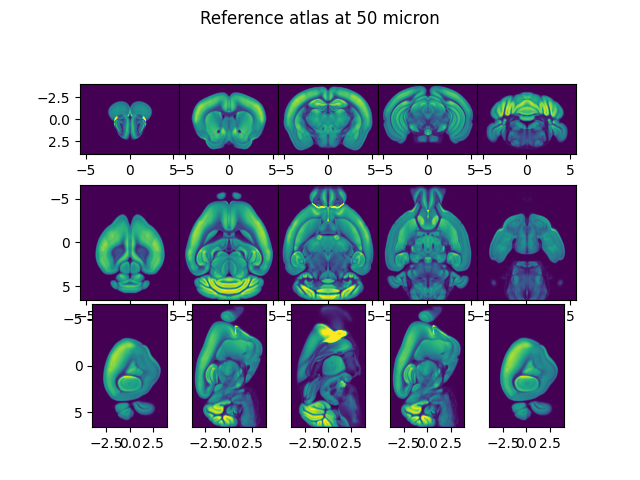

In [10]:
fig,ax = emlddmm.draw(Id,xId)
fig.suptitle('Reference atlas at 50 micron')
fig.canvas.draw()

In [11]:
xJd,Jd = emlddmm.downsample_image_domain(xJ,J,downJ)
dJd = [x[1] - x[0] for x in xJd]
dJd

[0.04999999888241291, 0.04999999888241291, 0.04999999888241291]

<IPython.core.display.Javascript object>


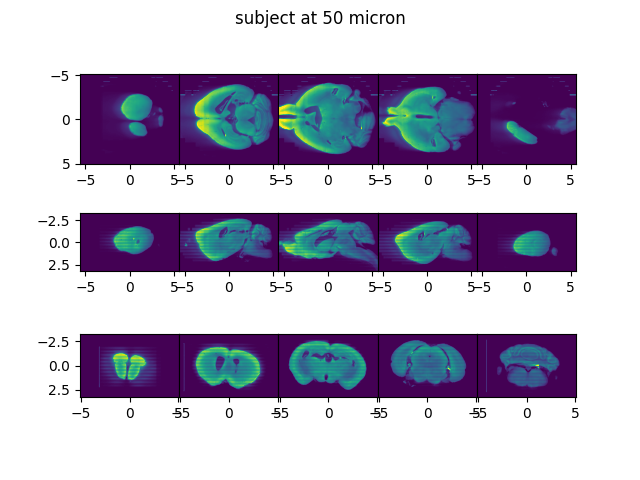

In [12]:
fig,ax = emlddmm.draw(Jd,xJd)
fig.suptitle('subject at 50 micron')
fig.canvas.draw()

# estimate an initial orientation
By reading left to right on each row in the above figures, we can get a three letter acronym quantifying their orientation.

Since we cannot reliably identify left right from this data, we assume a right handed coordinate system.

We estimate an initial scale to position the two brains roughly on top of one another.

/home/dtward/data/csh_data/emlddmm/emlddmm.py:3784: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  X = torch.as_tensor(X,dtype=self.data.dtype,device=self.data.device)


<IPython.core.display.Javascript object>


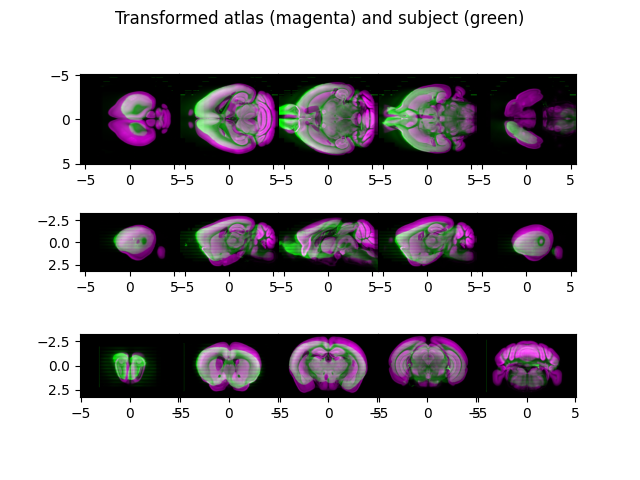

In [13]:
orientation_I = 'PIR'
orientation_J = 'IRP'
scale = 0.8
L = emlddmm.orientation_to_orientation('PIR','IRP')
A = np.eye(4)
A[:3,:3] = L*scale

tform = emlddmm.Transform(A,'b')
Xs = tform.apply(np.meshgrid(*xJd,indexing='ij'))
AI = emlddmm.apply_transform_float(xId,Id,Xs)
fig,ax = emlddmm.draw(np.concatenate((AI,Jd)),xJd)
fig.suptitle('Transformed atlas (magenta) and subject (green)')
fig.canvas.draw()

# Run registration starting at low resolution

In [14]:

config = {
    'device':'cuda:0',
    'downI':[4,4,4], # downsampling
    'downJ':[4,4,4], 
    'dv':0.5, # sampling grid size for deformation (lower res than images because deformations are smooth)
    'sigmaM':2.0, # estimated variance for pixels where images match
    'sigmaB':4.0,# estimated variance for regions of missing tissue (background)
    'sigmaA':10.0, # estimated variance for artifact regions 
    'sigmaR':1e3, # regularization for diffeomorphism
    'a':0.5, # spatial scale for diffeomorphism
    'n_iter':1000, # number of iterations of grdient descent  
    'v_start':0, # start optimizing deformation at the 0th iteration
    'eA':1e-2, # step size for affine
    'ev':2e1, # step size for deformation
    'A':A, # initial guess for afine
    'muB':0.0, # known background pixel value
    'update_muB':0, # don't update our guess background pixel value
    'update_muA':0, # don't update our guess for artifact pixel value    
    'n_draw':25,
    'local_contrast':[16,16,16] # To deal with inhomogeneity in intensity, we will estimate contrast locally in 16 pixel cubes.
}

<IPython.core.display.Javascript object>


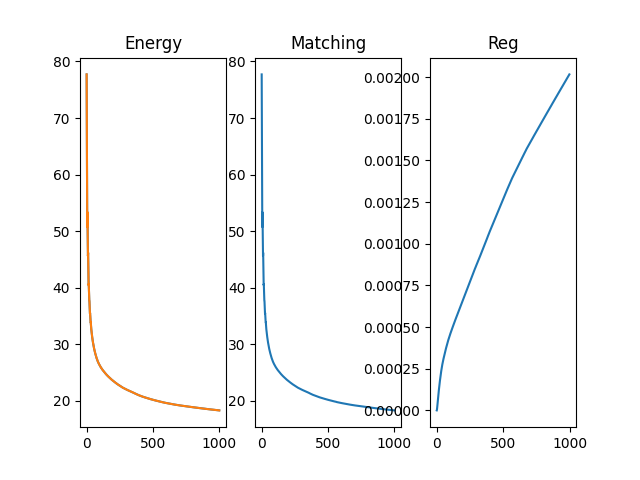

<IPython.core.display.Javascript object>


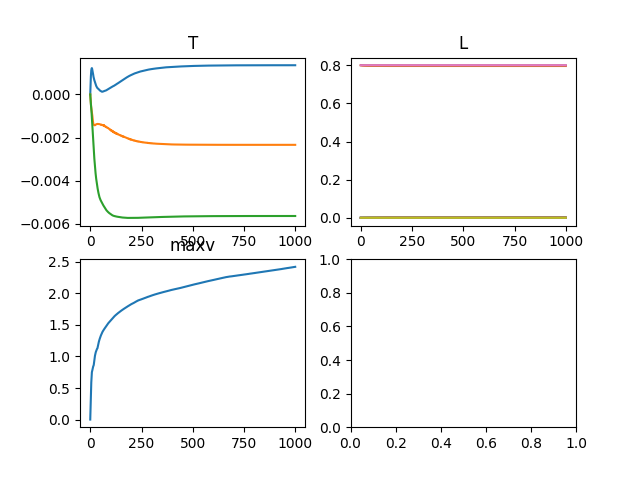

<IPython.core.display.Javascript object>


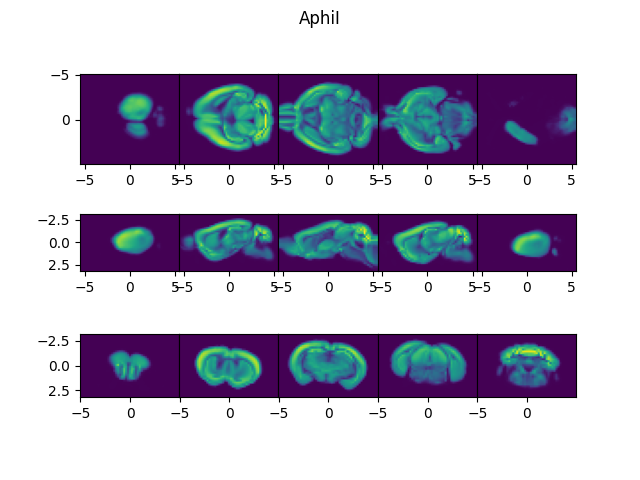

<IPython.core.display.Javascript object>


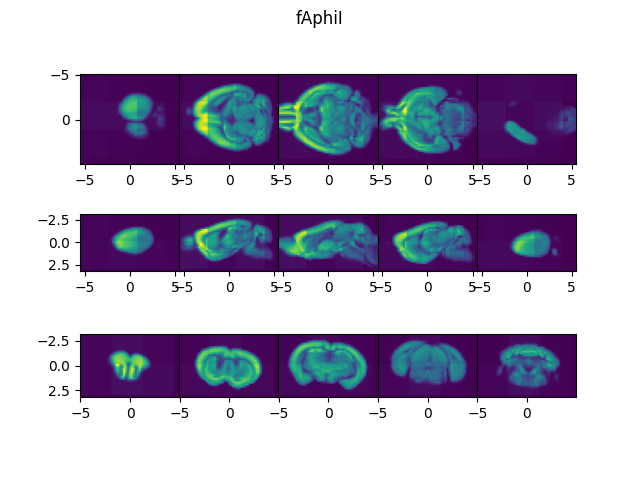

<IPython.core.display.Javascript object>


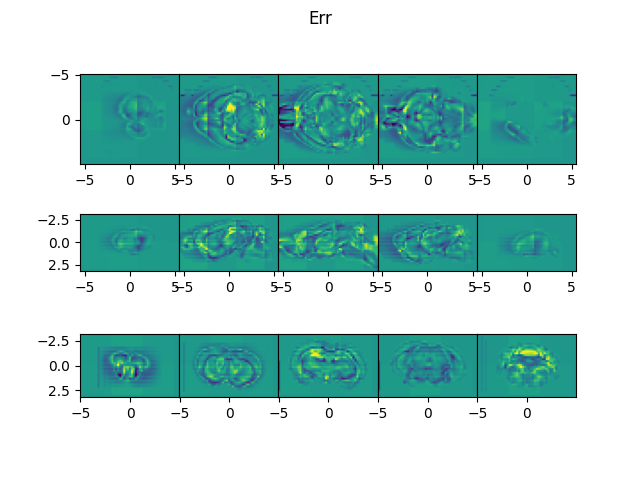

<IPython.core.display.Javascript object>


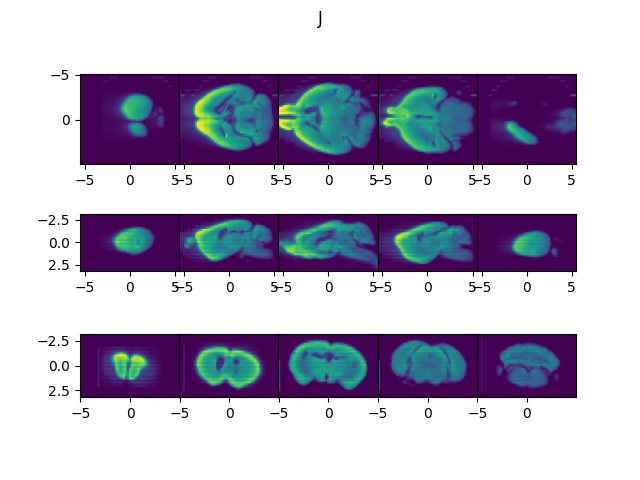

<IPython.core.display.Javascript object>


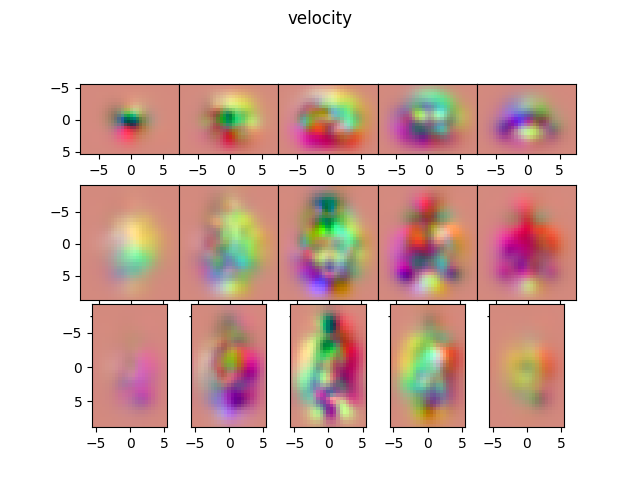

<IPython.core.display.Javascript object>


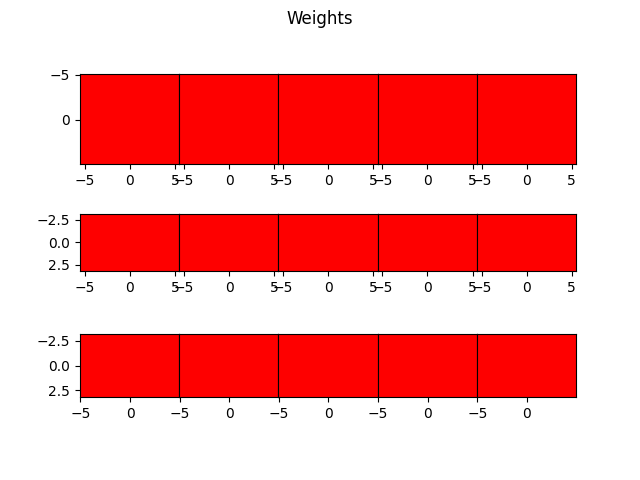

/home/dtward/data/csh_data/emlddmm/emlddmm.py:180: RuntimeWarning: invalid value encountered in true_divide
  J /= (vmax[:,None,None,None] - vmin[:,None,None,None])


Iteration 70, translation oscilating, reducing eA to 0.009000000000000001
Iteration 80, translation oscilating, reducing eA to 0.008100000000000001
Iteration 100, translation oscilating, reducing eA to 0.007290000000000001
Iteration 110, translation oscilating, reducing eA to 0.006561000000000002
Iteration 120, translation oscilating, reducing eA to 0.005904900000000002
Iteration 130, translation oscilating, reducing eA to 0.005314410000000002
Iteration 150, translation oscilating, reducing eA to 0.004782969000000002
Iteration 160, translation oscilating, reducing eA to 0.004304672100000002
Iteration 180, linear oscilating, reducing eA to 0.003874204890000002
Iteration 190, translation oscilating, reducing eA to 0.003486784401000002
Iteration 200, translation oscilating, reducing eA to 0.003138105960900002
Iteration 210, linear oscilating, reducing eA to 0.0028242953648100018
Iteration 220, translation oscilating, reducing eA to 0.0025418658283290017
Iteration 230, translation oscilati

In [15]:
output = emlddmm.emlddmm(xI=xId,I=Id,xJ=xJd,J=Jd,**config)

# Repeat at higher resolution

In [16]:
config['downI'] = [3,3,3] # this example will register at 100 microns
config['downJ'] = [3,3,3]
config['v_start'] = 0
config['eA'] = config['eA']*0.5
config['ev'] = config['ev']*0.5
config['n_iter'] = 500 # use fewer iterations

# restart with results from the last run
config['A'] = output['A']
config['v'] = output['v']

/home/dtward/data/csh_data/emlddmm/emlddmm.py:1410: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = torch.tensor(v.detach().clone(),device=device,dtype=dtype)
/home/dtward/data/csh_data/emlddmm/emlddmm.py:1454: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(A.detach().clone(),device=device,dtype=dtype)


<IPython.core.display.Javascript object>


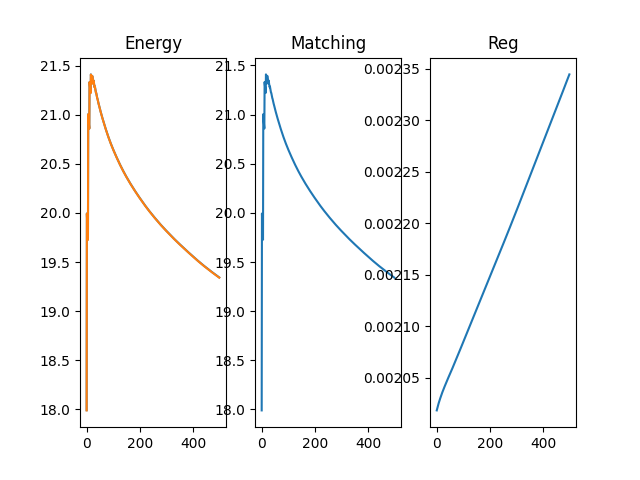

<IPython.core.display.Javascript object>


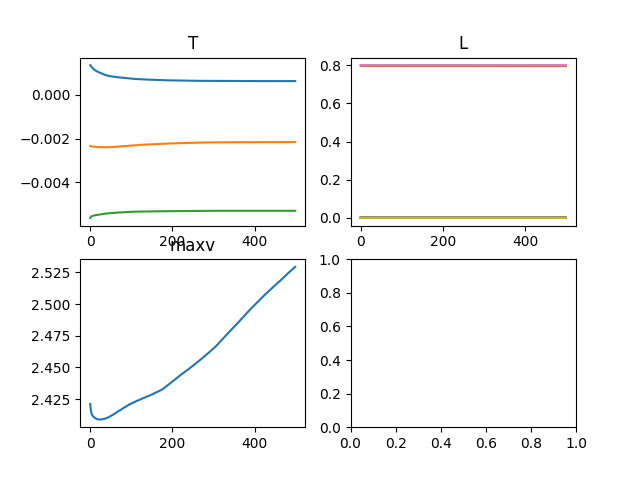

<IPython.core.display.Javascript object>


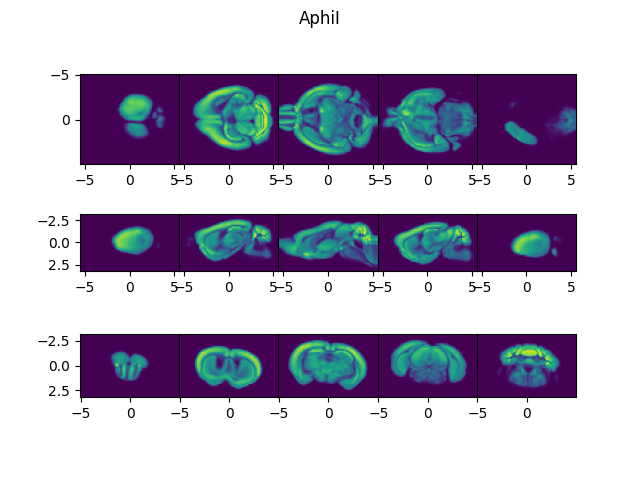

<IPython.core.display.Javascript object>


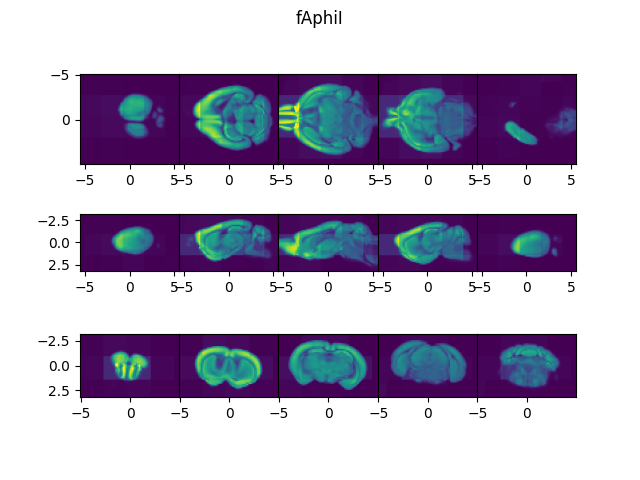

<IPython.core.display.Javascript object>


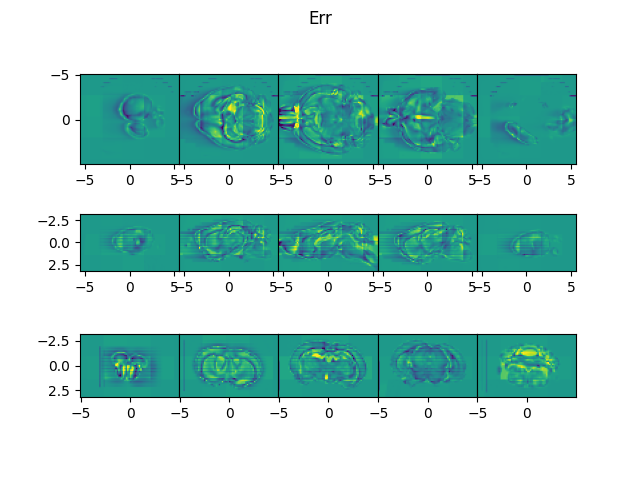

<IPython.core.display.Javascript object>


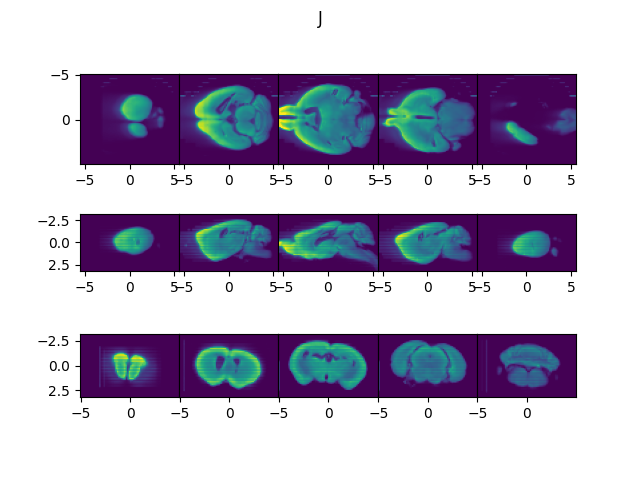

<IPython.core.display.Javascript object>


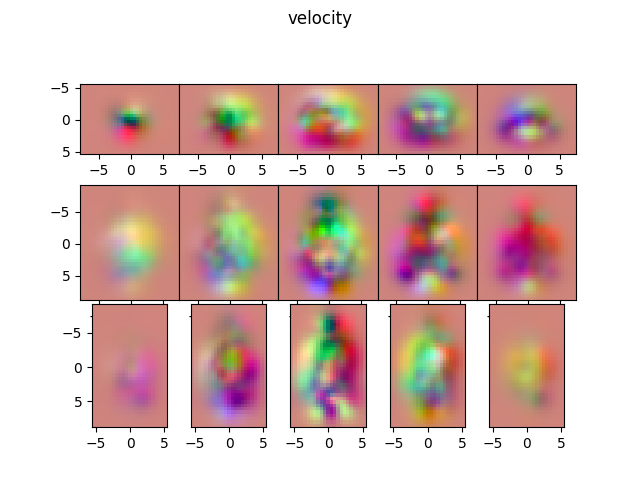

/home/dtward/data/csh_data/emlddmm/emlddmm.py:1531: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figW = plt.figure()


<IPython.core.display.Javascript object>


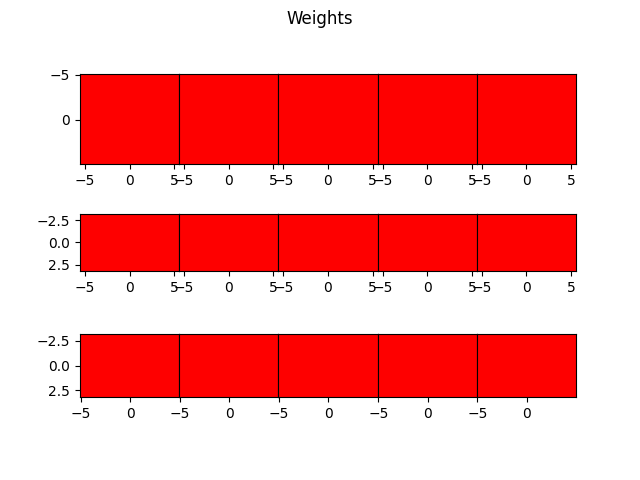

Iteration 40, translation oscilating, reducing eA to 0.0045000000000000005
Iteration 90, linear oscilating, reducing eA to 0.004050000000000001
Iteration 100, translation oscilating, reducing eA to 0.0036450000000000007
Iteration 110, translation oscilating, reducing eA to 0.003280500000000001
Iteration 130, linear oscilating, reducing eA to 0.002952450000000001
Iteration 150, linear oscilating, reducing eA to 0.002657205000000001
Iteration 160, linear oscilating, reducing eA to 0.002391484500000001
Iteration 190, linear oscilating, reducing eA to 0.002152336050000001
Iteration 210, linear oscilating, reducing eA to 0.001937102445000001
Iteration 220, linear oscilating, reducing eA to 0.001743392200500001
Iteration 230, linear oscilating, reducing eA to 0.001569052980450001
Iteration 240, linear oscilating, reducing eA to 0.0014121476824050009
Iteration 250, linear oscilating, reducing eA to 0.0012709329141645008
Iteration 260, linear oscilating, reducing eA to 0.0011438396227480508
It

In [17]:
output = emlddmm.emlddmm(xI=xId,I=Id,xJ=xJd,J=Jd,**config)

In [18]:
config['downI'] = [2,2,2] # this example will register at 100 microns
config['downJ'] = [2,2,2]
config['v_start'] = 0
config['eA'] = config['eA']*0.5
config['ev'] = config['ev']*0.5
config['n_iter'] = 250 # use fewer iterations

# restart with results from the last run
config['A'] = output['A']
config['v'] = output['v']

<IPython.core.display.Javascript object>


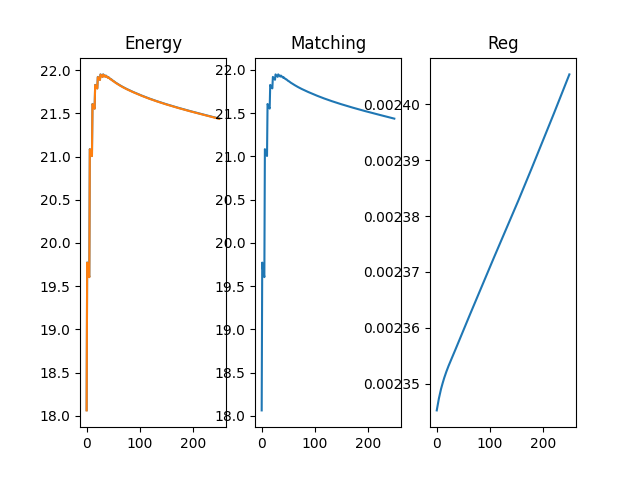

<IPython.core.display.Javascript object>


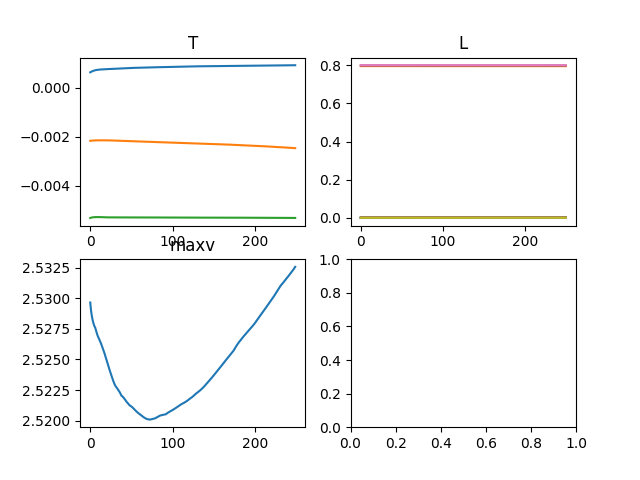

<IPython.core.display.Javascript object>


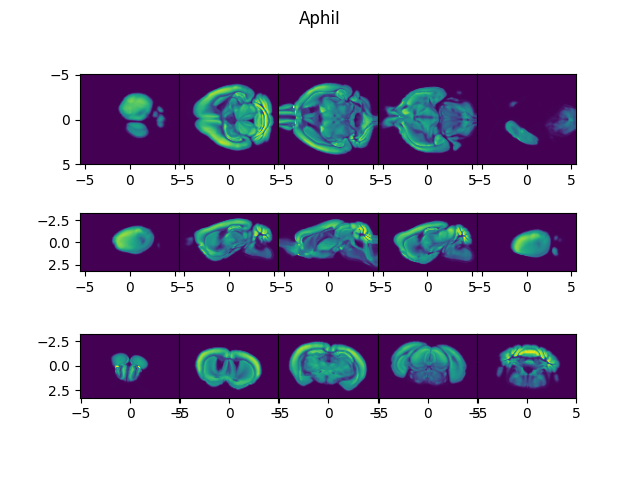

<IPython.core.display.Javascript object>


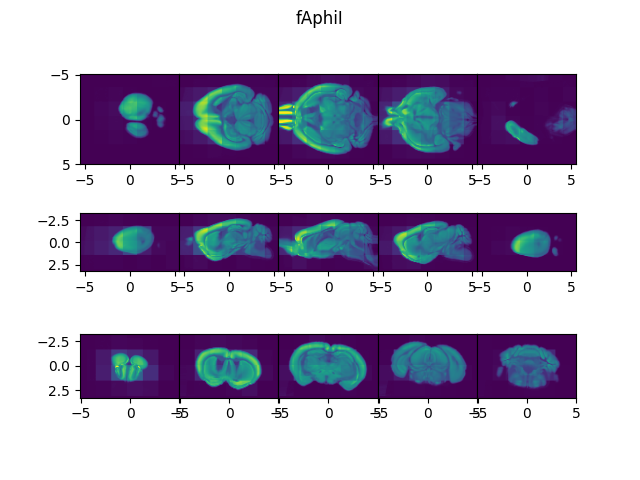

<IPython.core.display.Javascript object>


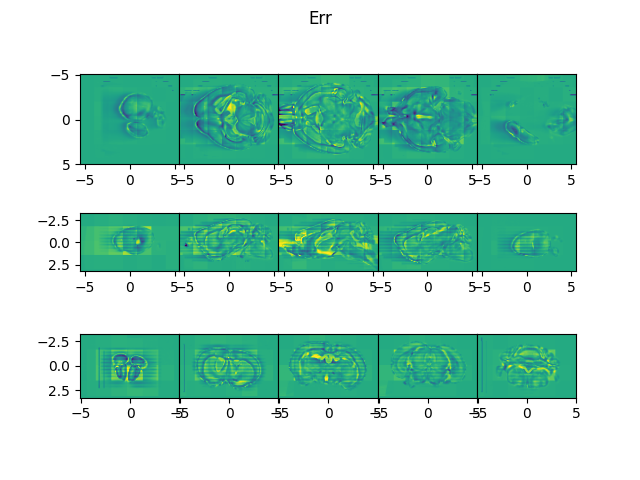

<IPython.core.display.Javascript object>


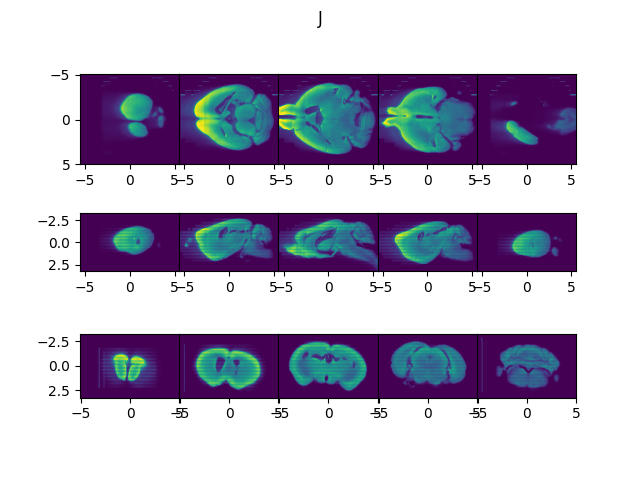

<IPython.core.display.Javascript object>


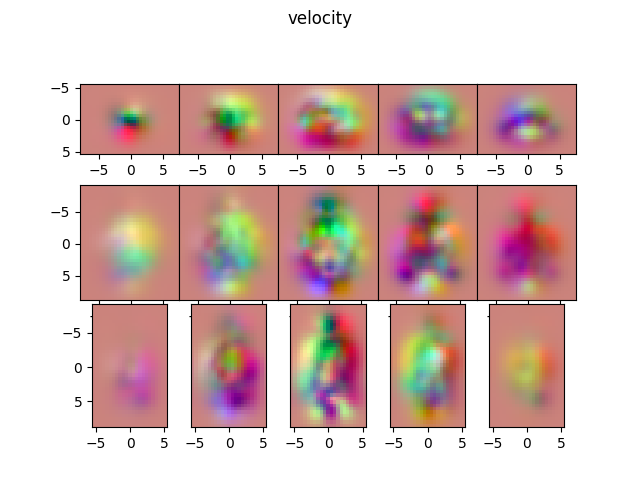

<IPython.core.display.Javascript object>


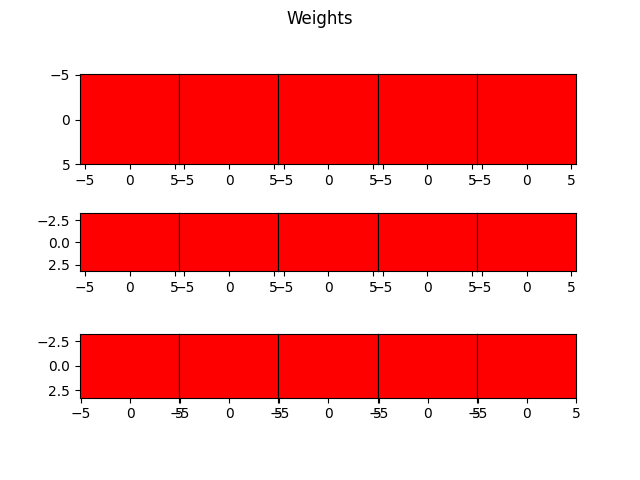

Iteration 30, linear oscilating, reducing eA to 0.0022500000000000003
Iteration 130, translation oscilating, reducing eA to 0.0020250000000000003


In [19]:
output = emlddmm.emlddmm(xI=xId,I=Id,xJ=xJd,J=Jd,**config)

## Make some visualizations of the result to verify accuracy

In [20]:
# accuracy in target space
tform = emlddmm.compose_sequence([emlddmm.Transform(output['A'],'b'),emlddmm.Transform(output['v'],'b',domain=output['xv'])],xJd)
AphiI = emlddmm.apply_transform_float(xId,Id,tform)

In [21]:
figsize = (9,5)
outdir = '.'
makedirs(outdir,exist_ok=True)

<IPython.core.display.Javascript object>


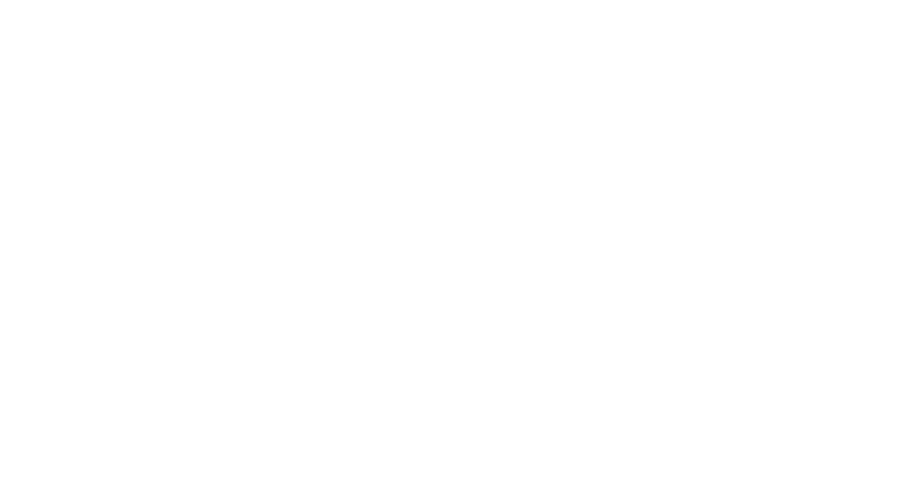

In [22]:

# let's make a grid
dgrid = 5.0
grid = [((x%dgrid) > dgrid/2)*2-1 for x in xJd]
GRID = (grid[0][:,None,None]*grid[1][None,:,None]*grid[2][None,None,:])*0.5+0.5
fig = plt.figure(figsize=figsize)
fig,ax = emlddmm.draw(GRID*Jd/np.quantile(Jd.ravel(),0.99) + (1-GRID)*AphiI.numpy()/np.quantile(Id.ravel(),0.99),[x for x in xJd],cmap='gray', n_slices=7, fig=fig)
fig.suptitle(f'target in target space with atlas image')
fig.subplots_adjust(left=0.05,right=0.99,bottom=0.01,wspace=0,hspace=0)
fig.savefig(join(outdir,'target_space_image.png'))

In [23]:
# accuracy in atlas space
tformi = emlddmm.compose_sequence([emlddmm.Transform(output['v'],'f',domain=output['xv']),emlddmm.Transform(output['A'],'f')],xId)
phiiAiJ = emlddmm.apply_transform_float(xJd,Jd,tformi,padding_mode='zeros')

<IPython.core.display.Javascript object>


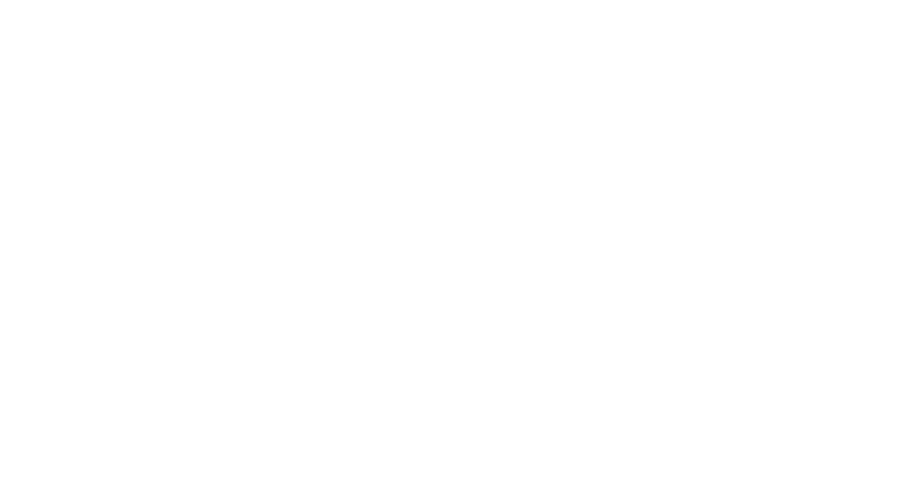

In [24]:
# 
grid = [((x%dgrid) > dgrid/2)*2-1 for x in xId]
GRID = (grid[0][:,None,None]*grid[1][None,:,None]*grid[2][None,None,:])*0.5+0.5
fig,ax = plt.subplots(figsize=figsize)
fig,ax = emlddmm.draw(GRID*phiiAiJ.numpy()/np.quantile(Jd.ravel(),0.99) + (1-GRID)*Id/np.quantile(Id.ravel(),0.99),[x for x in xI],cmap='gray',n_slices=7,fig=fig)
fig.suptitle(f'target in atlas space with atlas image')
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.05,wspace=0,hspace=0)
fig.savefig(join(outdir,'atlas_space_image.png'))